<a id='home'></a>
### purpose

create code for figs of landscape level vs plevel nested in marker_set


In [1]:
from pythonimports import *

import MVP_summary_functions as mvp

import seaborn as sns

summarydir = '/work/lotterhos/MVP-Offsets/run_20220919/summaries'
figdir = makedir(op.join(summarydir, 'figs/02_landscape_vs_other'))
pkldir = makedir(op.join(summarydir, 'all_performance_dicts'))

t1 = dt.now()  # notebook timer

mvp.latest_commit()
session_info.show()

#########################################################
Today:	February 09, 2023 - 10:33:00
python version: 3.8.5

Current commit of pythonimports:
commit b5f64910f19a2f05c80319052d8d8ce5edc6765a  
Author: Brandon Lind <lind.brandon.m@gmail.com>  
Date:   Mon Jan 30 10:30:11 2023 -0500

Current commit of MVP_offsets:
commit caa0fefccc33fb9bba80c1589c9992c24b1ca836  
Author: Brandon Lind <lind.brandon.m@gmail.com>  
Date:   Thu Feb 9 10:32:41 2023 -0500
#########################################################



In [2]:
# get validation scores across gardens across reps
all_scores = mvp.combine_level_dicts(use_bcs_data=False)

reading reps (use_bcs_data = False): 100%|███████████████| 5/5 [00:06<00:00,  1.32s/it]


0-225
	 RONA num seeds =  224
	 lfmm2 num seeds =  224
	 GF num seeds =  224
	 rda num seeds =  224


225-450
	 RONA num seeds =  225
	 lfmm2 num seeds =  225
	 GF num seeds =  225
	 rda num seeds =  225


450-675
	 RONA num seeds =  225
	 lfmm2 num seeds =  225
	 GF num seeds =  225
	 rda num seeds =  225


675-900
	 RONA num seeds =  225
	 lfmm2 num seeds =  225
	 GF num seeds =  225
	 rda num seeds =  225


900-1125
	 RONA num seeds =  225
	 lfmm2 num seeds =  225
	 GF num seeds =  225
	 rda num seeds =  225



 RONA df.shape = (674400, 15) num_seeds = 1124 num_reps = 5

 lfmm2 df.shape = (404400, 16) num_seeds = 1124 num_reps = 5

 GF df.shape = (337200, 15) num_seeds = 1124 num_reps = 5

 rda df.shape = (1078400, 17) num_seeds = 1124 num_reps = 5


In [3]:
programs = keys(all_scores)

programs

['RONA', 'lfmm2', 'GF', 'rda']

In [4]:
all_scores['GF'].head()

,garden,score,glevel,plevel,pleio,slevel,landscape,popsize,migration,marker_set,seed,simulation_level,noncausal_env,offset_level,rep,simulation_garden,final_LA,cor_TPR_temp,cor_TPR_sal
1231095,1,-0.903434,highly-polygenic,1-trait,no pleiotropy,NaN,Est-Clines,N-cline-N-to-S,m-constant,adaptive,1231095,highly-polygenic_1-trait_no-pleiotropy_nan_Est...,one noncausal,highly-polygenic_1-trait_no-pleiotropy_nan_Est...,0-225,highly-polygenic_1-trait_no-pleiotropy_nan_Est...,0.505075,0.531414,NaN
1231095,2,-0.905051,highly-polygenic,1-trait,no pleiotropy,NaN,Est-Clines,N-cline-N-to-S,m-constant,adaptive,1231095,highly-polygenic_1-trait_no-pleiotropy_nan_Est...,one noncausal,highly-polygenic_1-trait_no-pleiotropy_nan_Est...,0-225,highly-polygenic_1-trait_no-pleiotropy_nan_Est...,0.505075,0.531414,NaN
1231095,3,-0.909899,highly-polygenic,1-trait,no pleiotropy,NaN,Est-Clines,N-cline-N-to-S,m-constant,adaptive,1231095,highly-polygenic_1-trait_no-pleiotropy_nan_Est...,one noncausal,highly-polygenic_1-trait_no-pleiotropy_nan_Est...,0-225,highly-polygenic_1-trait_no-pleiotropy_nan_Est...,0.505075,0.531414,NaN
1231095,4,-0.914747,highly-polygenic,1-trait,no pleiotropy,NaN,Est-Clines,N-cline-N-to-S,m-constant,adaptive,1231095,highly-polygenic_1-trait_no-pleiotropy_nan_Est...,one noncausal,highly-polygenic_1-trait_no-pleiotropy_nan_Est...,0-225,highly-polygenic_1-trait_no-pleiotropy_nan_Est...,0.505075,0.531414,NaN
1231095,5,-0.911515,highly-polygenic,1-trait,no pleiotropy,NaN,Est-Clines,N-cline-N-to-S,m-constant,adaptive,1231095,highly-polygenic_1-trait_no-pleiotropy_nan_Est...,one noncausal,highly-polygenic_1-trait_no-pleiotropy_nan_Est...,0-225,highly-polygenic_1-trait_no-pleiotropy_nan_Est...,0.505075,0.531414,NaN


# functions for creating figs

In [5]:
def generic_landscape_fig(program, data, hue=None, hue_order=None, add_title='', filename=None):
    """Show how validation scores vary by *hue* nested in marker_set nested in landscape."""
    print(program)

    # so RDA outliers label looks nice
    data['marker_set'] = data['marker_set'].str.replace(' ', '\n')

    # create fig
    g = sns.catplot(data=data,
                    x='marker_set',
                    y='score',
                    order=sorted(data['marker_set'].unique()),  # x order
                    col='landscape',
                    col_order=mvp.hue_order['landscape'],  # ['SS-Clines', 'SS-Mtn', 'Est-Clines'],
                    kind='box',
                    hue=hue,
                    hue_order=hue_order,
                    height=4,
                    aspect=0.75,
                    margin_titles=False,
                    legend=True,
                    **mvp.boxplot_kwargs)

    # clean it up
    mvp.pretty_facetgrid(g,
                         program,
                         num_levels=luni(data.simulation_level),
                         num_reps=luni(data.rep),
                         add_title=add_title,
                         saveloc=op.join(figdir,
                                         filename if filename is not None else f'summary_{program}.pdf'))

    pass

# landscape vs plevel
pleiotropy nested in marker set nested in landscape

In [6]:
# Show how validation scores vary by pleio nested in marker_set nested in landscape
landscape_plevel_fig = partial(generic_landscape_fig,
                               hue='pleio',
                               hue_order=mvp.hue_order['pleio'])  # ['no pleiotropy', 'pleiotropy'])

landscape_plevel_fig 


RONA
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/02_landscape_vs_other/landscape_plevel_fig_RONA_garden_performance_2-trait_temp_only.pdf


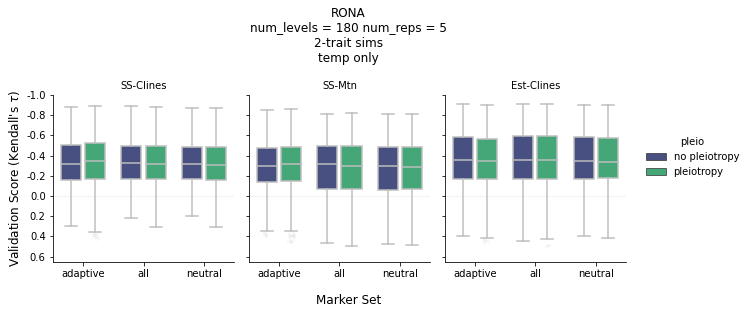

RONA
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/02_landscape_vs_other/landscape_plevel_fig_RONA_garden_performance_2-trait_sal_only.pdf


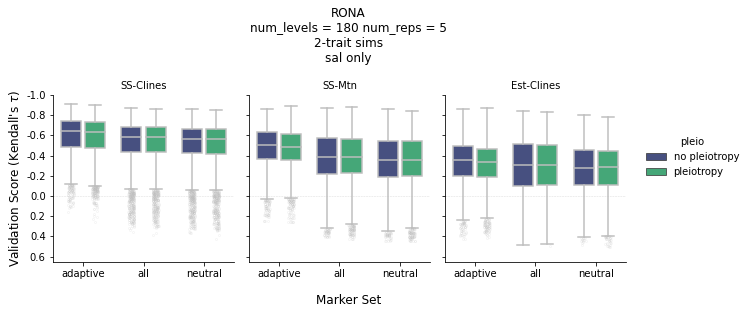

RONA
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/02_landscape_vs_other/landscape_plevel_fig_RONA_garden_performance_2-trait_both_envs.pdf


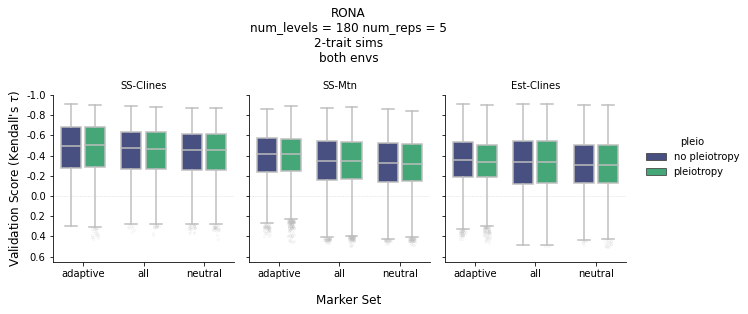

lfmm2
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/02_landscape_vs_other/landscape_plevel_fig_lfmm2_garden_performance_2-trait.pdf


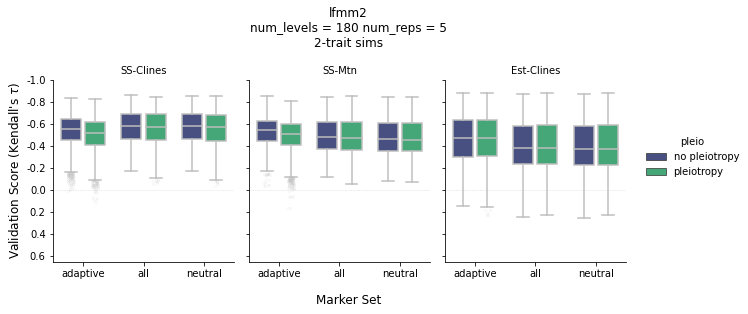

GF
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/02_landscape_vs_other/landscape_plevel_fig_GF_garden_performance_2-trait.pdf


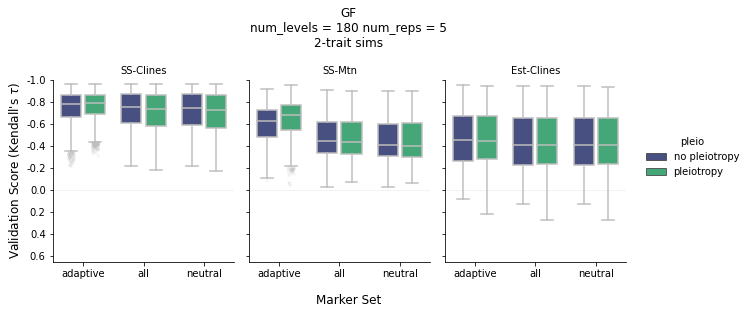

rda
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/02_landscape_vs_other/landscape_plevel_fig_rda_garden_performance_2-trait_structure_corr_+_uncorr.pdf


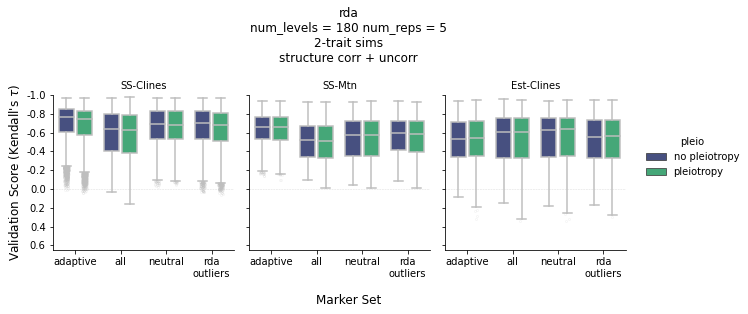

rda
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/02_landscape_vs_other/landscape_plevel_fig_rda_garden_performance_2-trait_nocorr.pdf


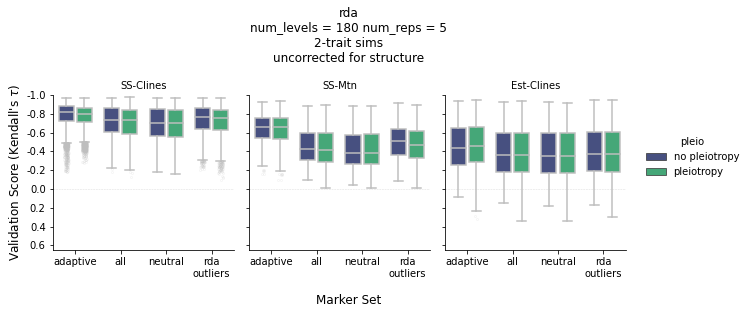

rda
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/02_landscape_vs_other/landscape_plevel_fig_rda_garden_performance_2-trait_structcorr.pdf


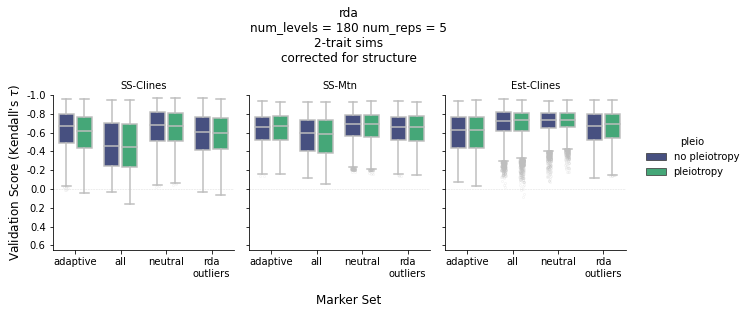

In [7]:
mvp.run_facetgrid_figs(landscape_plevel_fig, 'landscape_plevel_fig', all_scores)

# landscape vs slevel
selection nested in marker set nested in landscape

In [8]:
# Show how validation scores vary by slevel nested in marker_set nested in landscape
landscape_slevel_fig = partial(generic_landscape_fig,
                               hue='slevel',
                               hue_order=mvp.hue_order['slevel'])  # ['equal-S', 'unequal-S'])


landscape_slevel_fig 


RONA
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/02_landscape_vs_other/landscape_slevel_fig_RONA_garden_performance_2-trait_temp_only.pdf


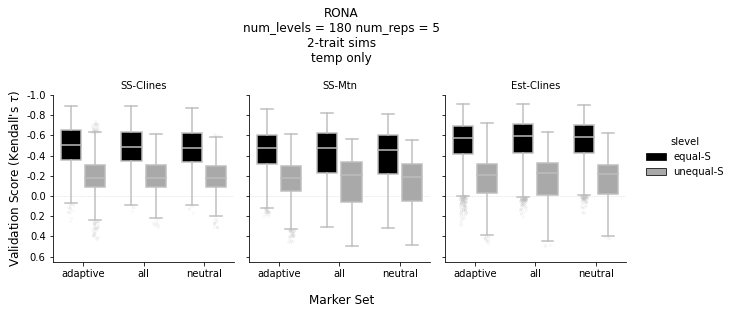

RONA
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/02_landscape_vs_other/landscape_slevel_fig_RONA_garden_performance_2-trait_sal_only.pdf


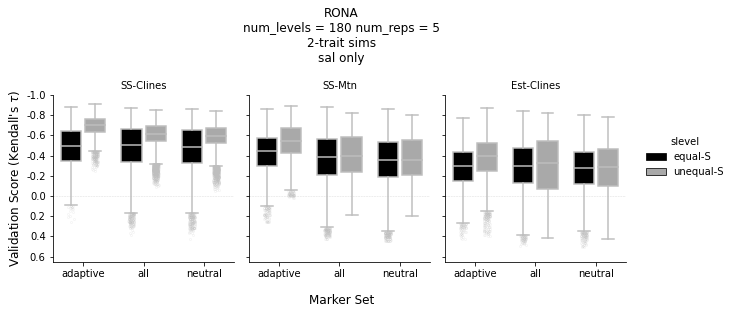

RONA
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/02_landscape_vs_other/landscape_slevel_fig_RONA_garden_performance_2-trait_both_envs.pdf


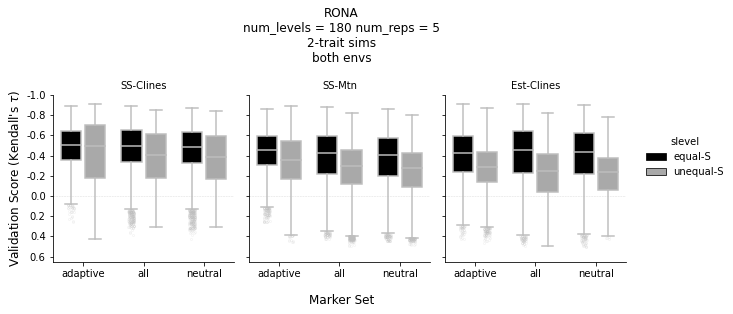

lfmm2
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/02_landscape_vs_other/landscape_slevel_fig_lfmm2_garden_performance_2-trait.pdf


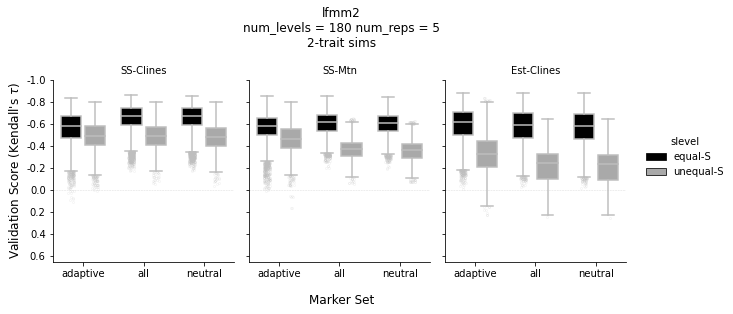

GF
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/02_landscape_vs_other/landscape_slevel_fig_GF_garden_performance_2-trait.pdf


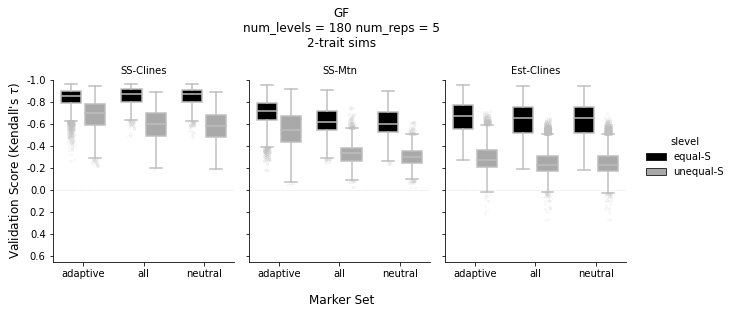

rda
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/02_landscape_vs_other/landscape_slevel_fig_rda_garden_performance_2-trait_structure_corr_+_uncorr.pdf


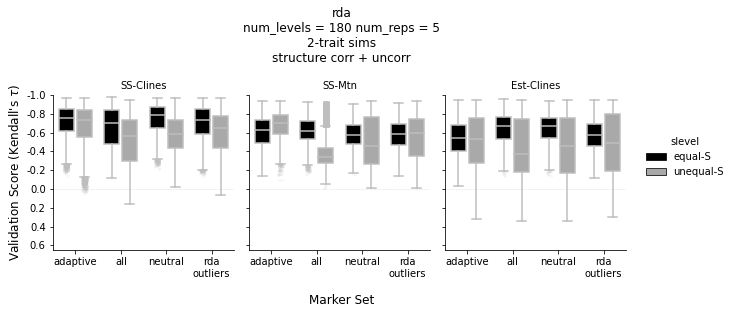

rda
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/02_landscape_vs_other/landscape_slevel_fig_rda_garden_performance_2-trait_nocorr.pdf


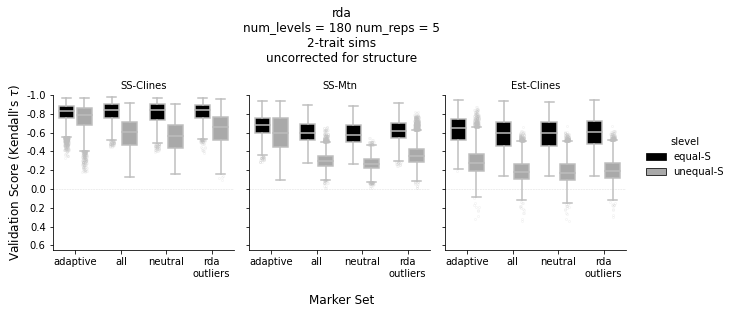

rda
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/02_landscape_vs_other/landscape_slevel_fig_rda_garden_performance_2-trait_structcorr.pdf


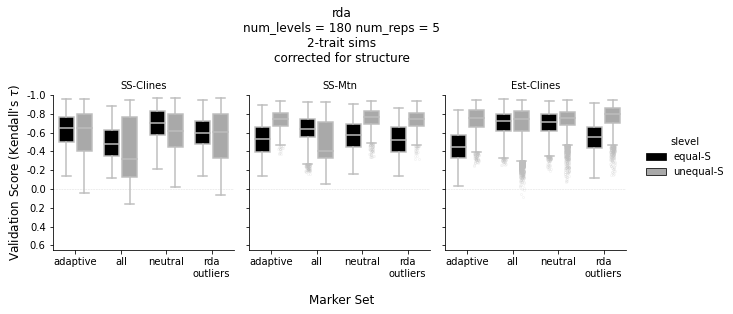

In [9]:
mvp.run_facetgrid_figs(landscape_slevel_fig, 'landscape_slevel_fig', all_scores)

# landscape vs popsize
popsize nested in marker set nested in landscape

In [10]:
# Show how how validation scores vary by slevel nested in marker_set nested in landscape
landscape_popsize_fig = partial(generic_landscape_fig,
                                hue='popsize',
                                hue_order=mvp.hue_order['popsize'])  # ['N-equal', 'N-variable', 'N-cline-center-to-edge', 'N-cline-N-to-S'])

landscape_popsize_fig 


RONA
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/02_landscape_vs_other/landscape_popsize_fig_RONA_garden_performance_2-trait_temp_only.pdf


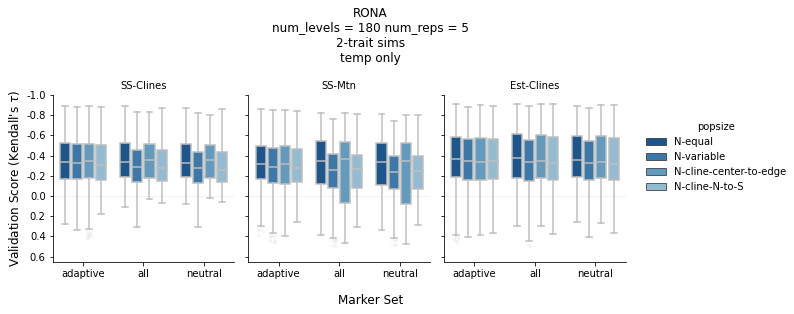

RONA
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/02_landscape_vs_other/landscape_popsize_fig_RONA_garden_performance_2-trait_sal_only.pdf


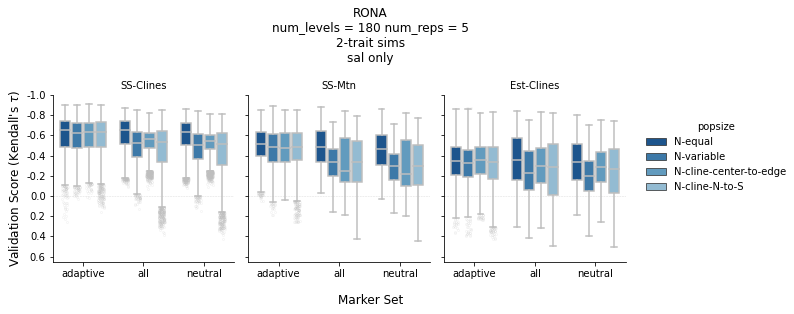

RONA
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/02_landscape_vs_other/landscape_popsize_fig_RONA_garden_performance_2-trait_both_envs.pdf


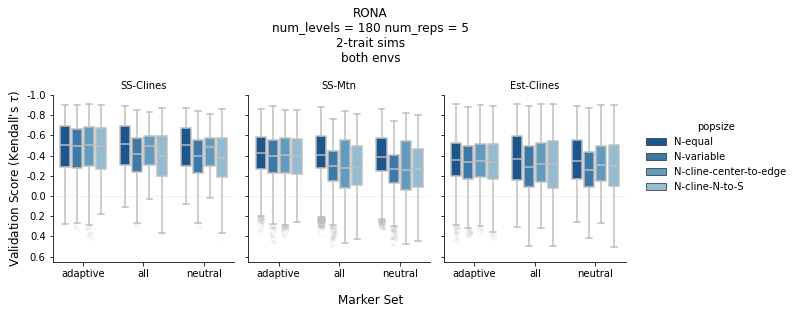

lfmm2
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/02_landscape_vs_other/landscape_popsize_fig_lfmm2_garden_performance_2-trait.pdf


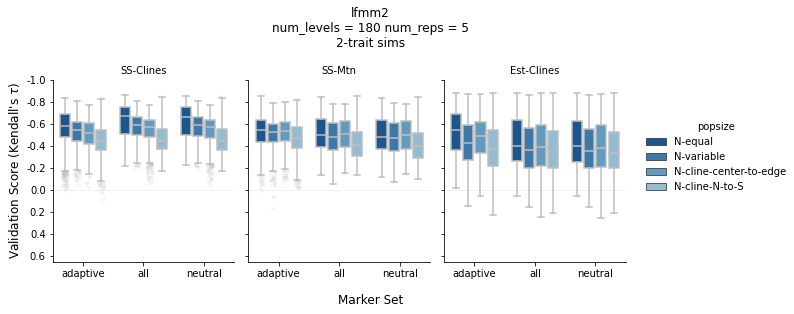

GF
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/02_landscape_vs_other/landscape_popsize_fig_GF_garden_performance_2-trait.pdf


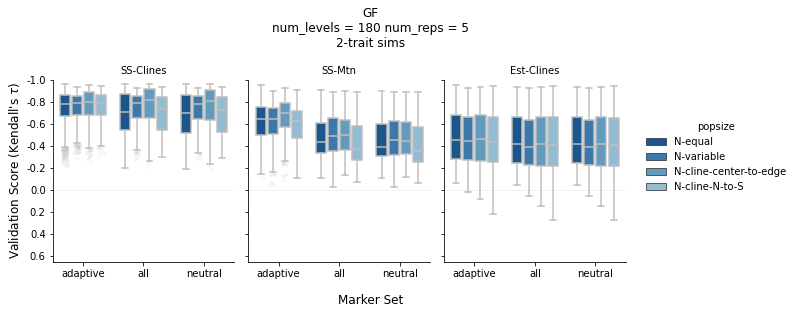

rda
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/02_landscape_vs_other/landscape_popsize_fig_rda_garden_performance_2-trait_structure_corr_+_uncorr.pdf


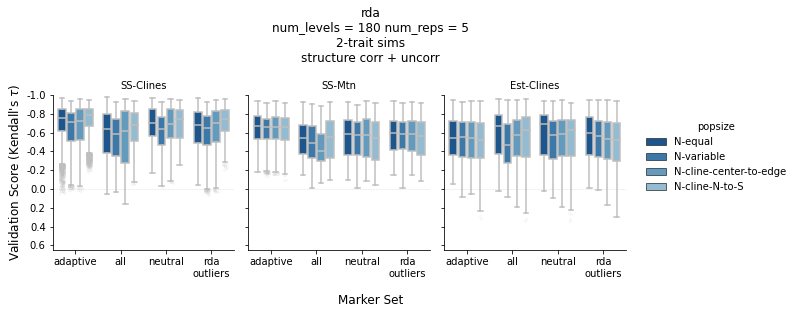

rda
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/02_landscape_vs_other/landscape_popsize_fig_rda_garden_performance_2-trait_nocorr.pdf


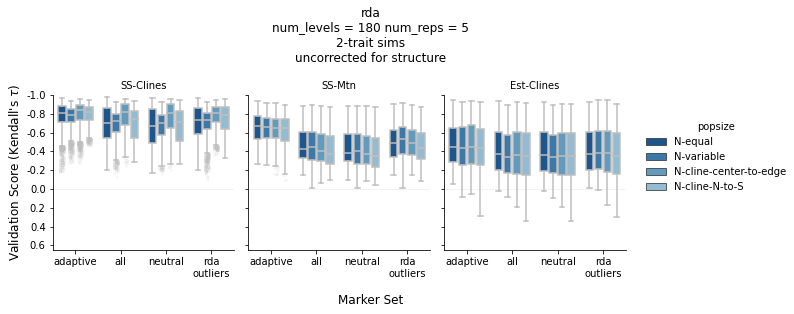

rda
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/02_landscape_vs_other/landscape_popsize_fig_rda_garden_performance_2-trait_structcorr.pdf


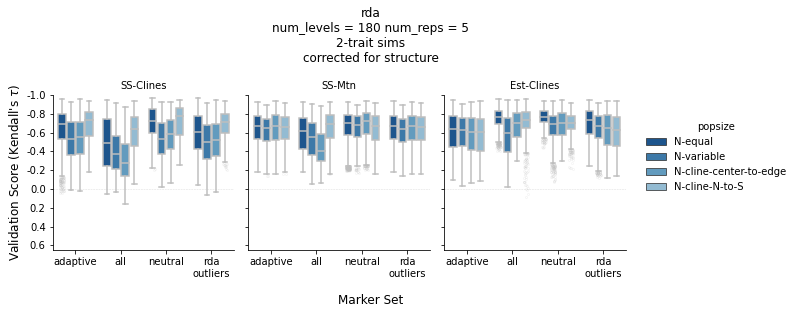

In [11]:
mvp.run_facetgrid_figs(landscape_popsize_fig, 'landscape_popsize_fig', all_scores)

# landscape vs migration
migration nested in marker set nested in landscape

In [12]:
# Show how validation scores vary by slevel nested in marker_set nested in landscape
landscape_migration_fig = partial(generic_landscape_fig,
                                  hue='migration',
                                  hue_order=mvp.hue_order['migration'])  # ['m-constant', 'm-variable', 'm-breaks'])

landscape_migration_fig 


RONA
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/02_landscape_vs_other/landscape_migration_fig_RONA_garden_performance_2-trait_temp_only.pdf


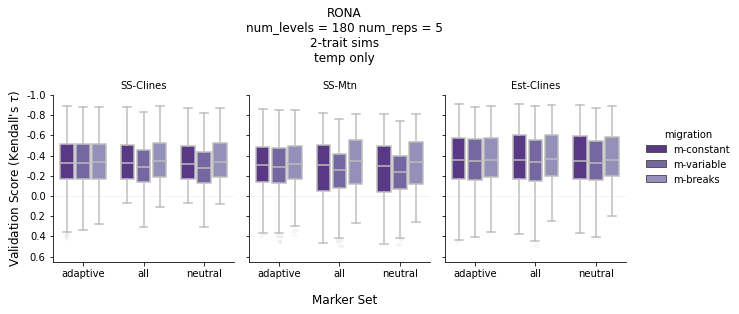

RONA
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/02_landscape_vs_other/landscape_migration_fig_RONA_garden_performance_2-trait_sal_only.pdf


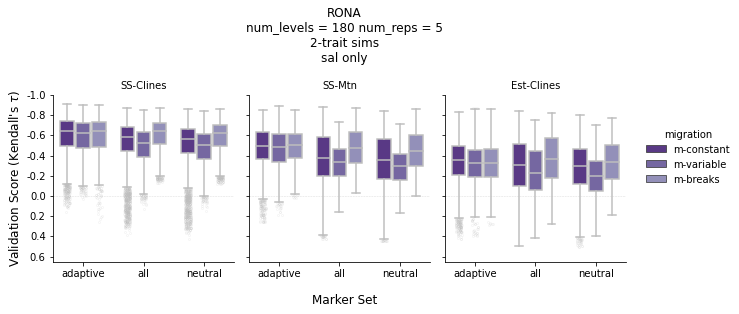

RONA
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/02_landscape_vs_other/landscape_migration_fig_RONA_garden_performance_2-trait_both_envs.pdf


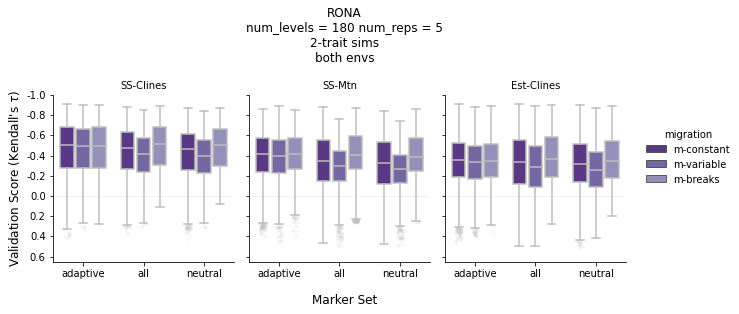

lfmm2
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/02_landscape_vs_other/landscape_migration_fig_lfmm2_garden_performance_2-trait.pdf


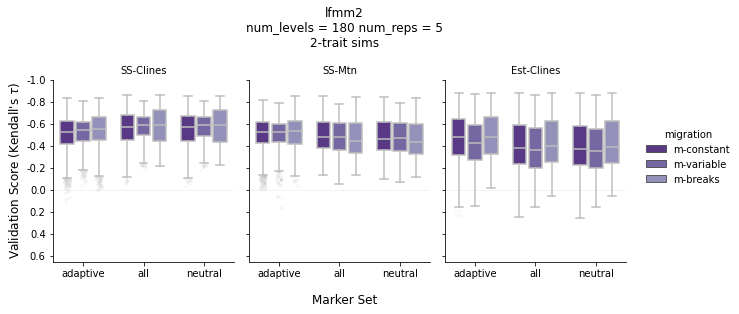

GF
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/02_landscape_vs_other/landscape_migration_fig_GF_garden_performance_2-trait.pdf


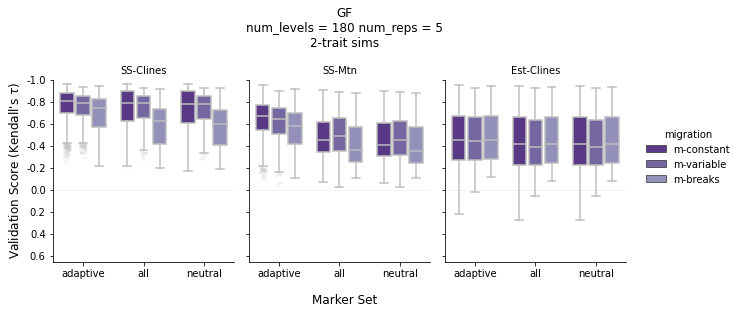

rda
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/02_landscape_vs_other/landscape_migration_fig_rda_garden_performance_2-trait_structure_corr_+_uncorr.pdf


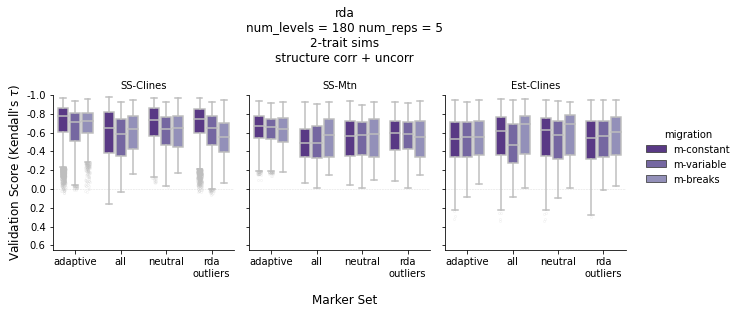

rda
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/02_landscape_vs_other/landscape_migration_fig_rda_garden_performance_2-trait_nocorr.pdf


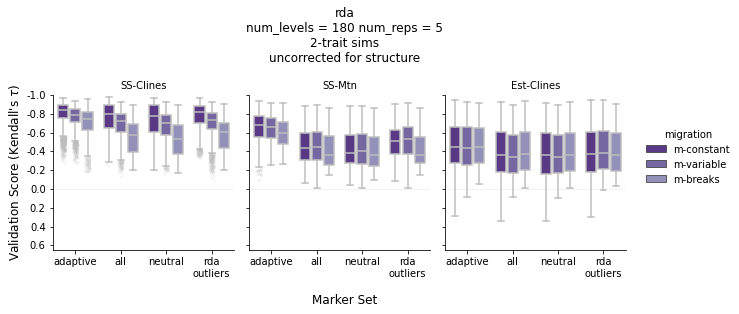

rda
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/02_landscape_vs_other/landscape_migration_fig_rda_garden_performance_2-trait_structcorr.pdf


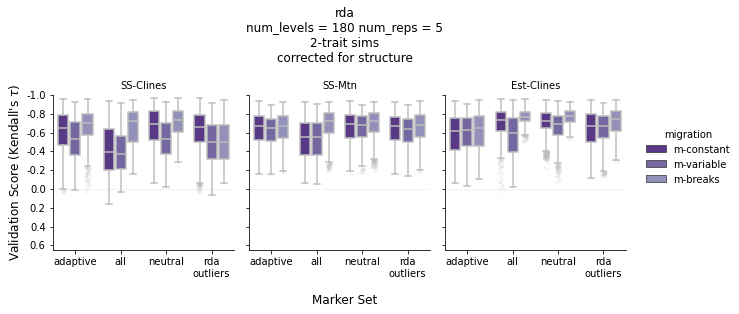

In [13]:
mvp.run_facetgrid_figs(landscape_migration_fig, 'landscape_migration_fig', all_scores)

# landscape vs adding non-causal envs to offset training

- sims with 

    1) one selective env but two were used to train offset ('one noncausal'), or 
    
    2) 2-traits and both envs used for offset ('all causal'), or 
    
    3) one selective env and one env used for offset ('no noncausal')

In [14]:
# what happens when non-causal envs are included in offset calculations?
landscape_noncausal_fig = partial(generic_landscape_fig,
                                  hue='noncausal_env',
                                  hue_order=mvp.hue_order['noncausal_env'])  # ['all causal', 'one noncausal', 'no noncausal'])

rda
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/02_landscape_vs_other/landscape_noncausal_fig_rda_garden_performance_1-or-2-trait_structure corr_+_uncorr.pdf


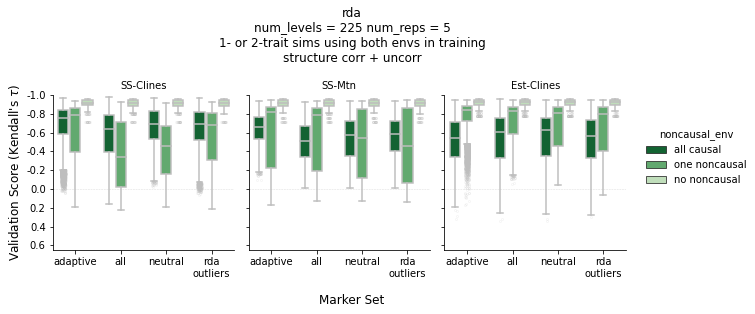

lfmm2
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/02_landscape_vs_other/landscape_noncausal_fig_lfmm2_garden_performance_1-or-2-trait.pdf


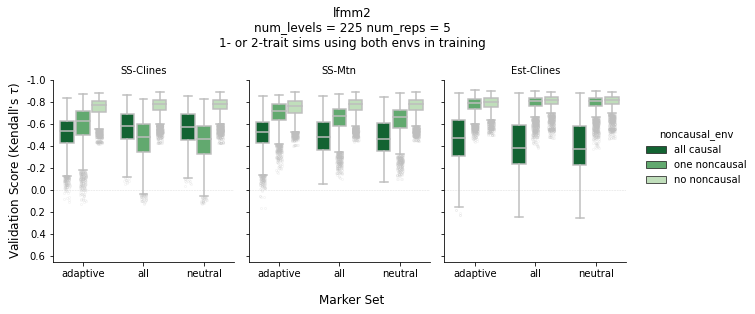

In [15]:
# rda structure-corrected + uncorrected
# lfmm
for program in ['rda', 'lfmm2']:    
    data = all_scores[program].copy()
    data = data[data['noncausal_env'].notnull()]  # remove np.nans
    
    add_title = '\n1- or 2-trait sims using both envs in training'
    if program == 'rda':
        add_title += '\nstructure corr + uncorr'
        add = '_structure corr_+_uncorr'
    else:
        add = ''
    
    landscape_noncausal_fig(
        program, data, add_title=add_title,
        filename=f'landscape_noncausal_fig_{program}_garden_performance_1-or-2-trait{add}.pdf'
    )
    

rda
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/02_landscape_vs_other/landscape_noncausal_fig_rda_garden_performance_1-or-2-trait_nocorr.pdf


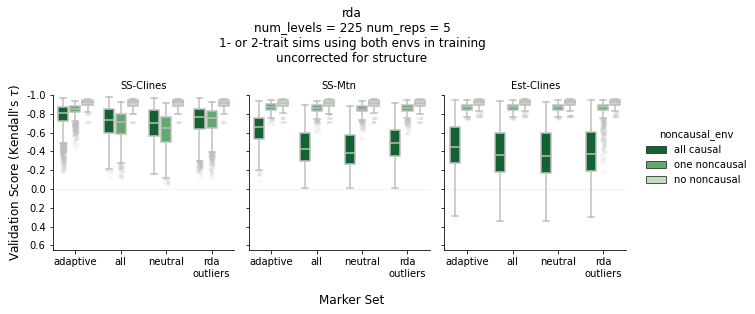

rda
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/02_landscape_vs_other/landscape_noncausal_fig_rda_garden_performance_1-or-2-trait_structcorr.pdf


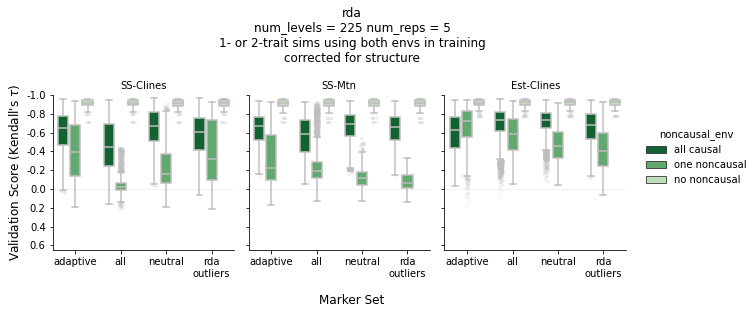

In [16]:
# compare RDA structure-corrected vs structure uncorrected (two figs)
for structcrxn in ['nocorr', 'structcorr']:
    data = all_scores['rda'].copy()
    data = data[data['noncausal_env'].notnull()]  # remove np.nans
    
    # filter for structure correction (or not)
    data = data[data['structcrxn'] == structcrxn]
    
    add_title = '\n1- or 2-trait sims using both envs in training'
    add_title += '\nuncorrected for structure' if structcrxn == 'nocorr' else '\ncorrected for structure'
    
    landscape_noncausal_fig(
        'rda',
        data,
        add_title=add_title, 
        filename=f'landscape_noncausal_fig_rda_garden_performance_1-or-2-trait_{structcrxn}.pdf'
    )

GF
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/02_landscape_vs_other/landscape_noncausal_fig_GF_garden_performance_1-or-2-trait.pdf


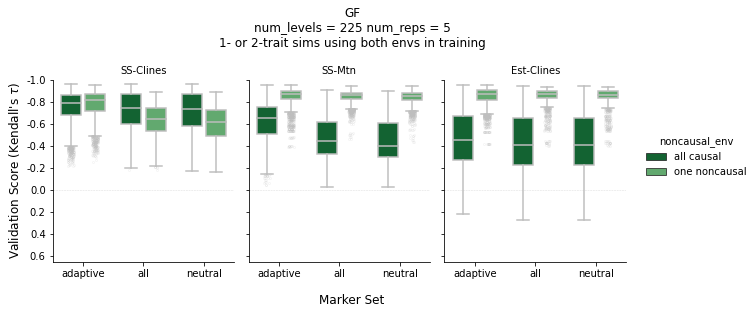

In [17]:
# gradient forests
data = all_scores['GF'].copy()

# data['noncausal_env'] = data.plevel.map({'1-trait' : 'one noncausal', '2-trait' : 'all causal'})

add_title = '\n1- or 2-trait sims using both envs in training'

landscape_noncausal_fig(
    'GF',
    data,
    add_title=add_title,
    hue_order=['all causal', 'one noncausal'],
    filename=f'landscape_noncausal_fig_GF_garden_performance_1-or-2-trait.pdf'
)

In [18]:
formatclock(dt.now() - t1, exact=True)

'0-00:01:33'